## Pandas 공식문서 튜토리얼 따라하기

# 9장 시계열 데이터를 쉽게 처리하는 방법

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
air_quality = pd.read_csv('/content/air_quality_no2_long.csv')

In [3]:
# date.utc -> datetime으로 변경
air_quality = air_quality.rename(columns={'date.utc':'datetime'})
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,microgram per m^3
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,microgram per m^3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,microgram per m^3
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,microgram per m^3
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,microgram per m^3


# pandas 날짜 / 속성 사용

In [4]:
air_quality['datetime']

0       2019-06-21 00:00:00+00:00
1       2019-06-20 23:00:00+00:00
2       2019-06-20 22:00:00+00:00
3       2019-06-20 21:00:00+00:00
4       2019-06-20 20:00:00+00:00
                  ...            
2063    2019-05-07 06:00:00+00:00
2064    2019-05-07 04:00:00+00:00
2065    2019-05-07 03:00:00+00:00
2066    2019-05-07 02:00:00+00:00
2067    2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: object

In [6]:
air_quality['datetime'] = pd.to_datetime(air_quality['datetime'])
air_quality['datetime']

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

In [7]:
# 시작 날짜와 종료날짜 알아보기
air_quality['datetime'].min(), air_quality['datetime'].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [8]:
# 날짜 정보로 계산 비교가 가능
air_quality['datetime'].max() - air_quality['datetime'].min()

Timedelta('44 days 23:00:00')

In [10]:
# month라는 새 열 추가하기
air_quality['month'] = air_quality['datetime'].dt.month
air_quality.head()
# month, year, quarter 등 모든 속성은 dt 접근자로 액세스가 가능

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,microgram per m^3,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,microgram per m^3,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,microgram per m^3,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,microgram per m^3,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,microgram per m^3,6


In [11]:
# no2 요일별 농도 평균 알아보기
air_quality.groupby(
    [air_quality["datetime"].dt.weekday, "location"])["value"].mean()
#weekdat(월요일 =0 ~ 일요일 = 6)을 표현한다.

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

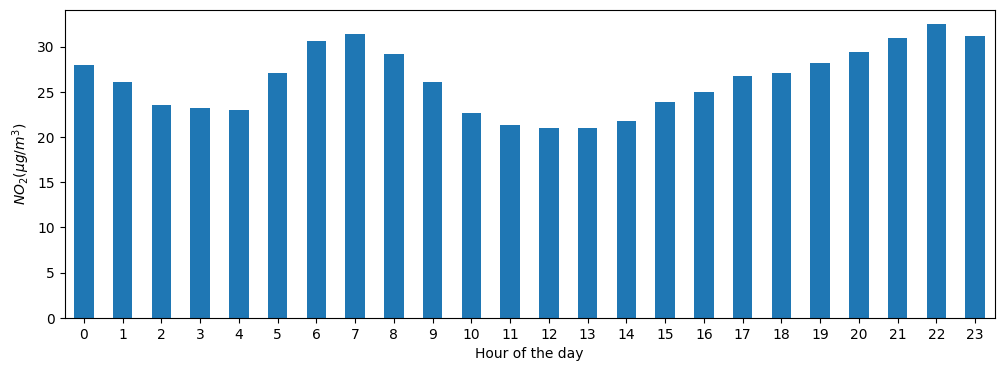

In [14]:
# no2 하루 중 각 시간의 평균값
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(
    kind="bar", rot=0, ax=axs # rot 는 글씨의 회전
)
plt.xlabel("Hour of the day");
plt.ylabel("$NO_2 (µg/m^3)$");

# 날짜 / 시간 index

In [15]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")
no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


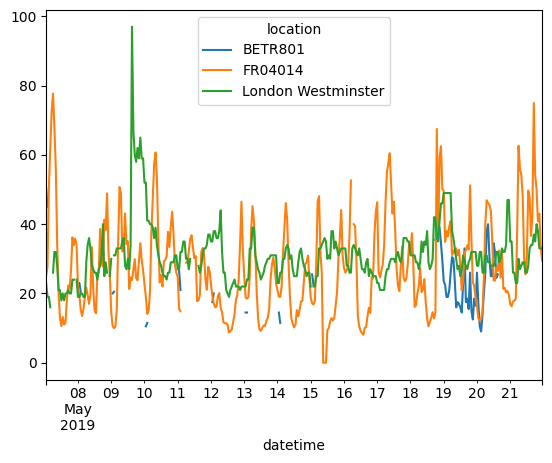

In [20]:
#no2의 5월 7일 ~ 5월 21일까지의 그래프
no_2["2019-05-7": "2019-05-21"].plot();